<b><font size="4">Imports and load dataset</font></b>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#to display all rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)


In [2]:
df=pd.read_csv('deliveriess_updatedd.csv')


In [3]:
df.matchId.unique()

array([1082591, 1082592, 1082593, 1082594, 1082595, 1082596, 1082597,
       1082598, 1082599, 1082600, 1082601, 1082602, 1082603, 1082604,
       1082605, 1082606, 1082607, 1082608, 1082609, 1082610, 1082611,
       1082612, 1082613, 1082614, 1082615, 1082616, 1082617, 1082618,
       1082620, 1082621, 1082622, 1082623, 1082624, 1082625, 1082626,
       1082627, 1082628, 1082629, 1082630, 1082631, 1082632, 1082633,
       1082634, 1082635, 1082636, 1082637, 1082638, 1082639, 1082640,
       1082641, 1082642, 1082643, 1082644, 1082645, 1082646, 1082647,
       1082648, 1082649, 1082650, 1136561, 1136562, 1136563, 1136564,
       1136565, 1136566, 1136567, 1136568, 1136569, 1136570, 1136571,
       1136572, 1136573, 1136574, 1136575, 1136576, 1136577, 1136578,
       1136579, 1136580, 1136581, 1136582, 1136583, 1136584, 1136585,
       1136586, 1136587, 1136588, 1136589, 1136590, 1136591, 1136592,
       1136593, 1136594, 1136595, 1136596, 1136597, 1136598, 1136599,
       1136600, 1136

In [4]:
df.head(1)

matchId  inning  over_ball  over  ball         batting_team                 bowling_team    batsman non_striker    bowler  batsman_runs  extras  total_runs  isWide  isNoBall  Byes  LegByes  Penalty dismissal_kind player_dismissed  isBowlerWk
0  1082591  1       0.1        0     1     Sunrisers Hyderabad  Royal Challengers Bangalore  DA Warner  S Dhawan    TS Mills  0             0       0          NaN     NaN       NaN   NaN      NaN       NaN            NaN              0

<b><font size="4">Separate dataframe for both the innings</font></b>

In [5]:
#separate df for ing 1 and ing2
df1=df[df.inning==1]
df2=df[df.inning==2]


In [6]:
df1.reset_index(inplace=True, drop=True)
df2.reset_index(inplace=True, drop=True)

In [7]:
#step1- populate runs for both innings
#step2- populate wickets for both innings
df1.head(1)

matchId  inning  over_ball  over  ball         batting_team                 bowling_team    batsman non_striker    bowler  batsman_runs  extras  total_runs  isWide  isNoBall  Byes  LegByes  Penalty dismissal_kind player_dismissed  isBowlerWk
0  1082591  1       0.1        0     1     Sunrisers Hyderabad  Royal Challengers Bangalore  DA Warner  S Dhawan    TS Mills  0             0       0          NaN     NaN       NaN   NaN      NaN       NaN            NaN              0

In [8]:
df2.head(1)

matchId  inning  over_ball  over  ball                 batting_team         bowling_team   batsman    non_striker   bowler  batsman_runs  extras  total_runs  isWide  isNoBall  Byes  LegByes  Penalty dismissal_kind player_dismissed  isBowlerWk
0  1082591  2       0.1        0     1     Royal Challengers Bangalore  Sunrisers Hyderabad  CH Gayle  Mandeep Singh  A Nehra  1             0       1          NaN     NaN       NaN   NaN      NaN       NaN            NaN              0

Text(0.5, 1.0, 'Sample chart')

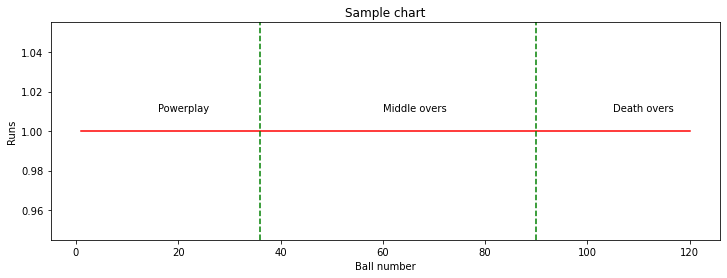

In [9]:

x=[i for i in range(1,121)]
y=[1 for i in range(1,121)]

plt.figure(figsize=(12,4))
plt.plot(x,y,c='r')

plt.axvline(x=36,ls='--',c='g')
plt.axvline(x=90,ls='--',c='g')

plt.text(16,1.01,'Powerplay')
plt.text(60,1.01,'Middle overs')
plt.text(105,1.01,'Death overs')

plt.xlabel('Ball number')
plt.ylabel('Runs')
plt.title('Sample chart')

In [10]:
#we need index of ball numbers where wickets fell and the runs(cum runs) at that point

In [11]:
df1[~df1.player_dismissed.isna()]

matchId  inning  over_ball  over  ball                 batting_team                 bowling_team                  batsman        non_striker                   bowler  batsman_runs  extras  total_runs  isWide  isNoBall  Byes  LegByes  Penalty     dismissal_kind         player_dismissed  isBowlerWk
11      1082591  1       1.5        1     5     Sunrisers Hyderabad          Royal Challengers Bangalore  DA Warner                S Dhawan           A Choudhary              0             0       0          NaN     NaN       NaN   NaN      NaN       caught             DA Warner                1         
64      1082591  1       10.3       10    3     Sunrisers Hyderabad          Royal Challengers Bangalore  S Dhawan                 MC Henriques       STR Binny                0             0       0          NaN     NaN       NaN   NaN      NaN       caught             S Dhawan                 1         
94      1082591  1       15.2       15    2     Sunrisers Hyderabad          Royal Challengers Bangalore  MC Henriques             Yuvraj Singh       YS Chahal                0             0       0          NaN     NaN       NaN   NaN      NaN       caught             MC Henriques             1         
116     1082591  1       18.4       18    4     Sunrisers Hyderabad          Royal Challengers Bangalore  Yuvraj Singh             DJ Hooda           TS Mills                 0             0       0          NaN     NaN       NaN   NaN      NaN       bowled             Yuvraj Singh             1         
151     1082592  1       4.2        4     2     Mumbai Indians               Rising Pune Supergiant       PA Patel                 JC Buttler         Imran Tahir              0             0       0          NaN     NaN       NaN   NaN      NaN       bowled             PA Patel                 1         
164     1082592  1       6.3        6     3     Mumbai Indians               Rising Pune Supergiant       RG Sharma                JC Buttler         Imran Tahir              0             0       0          NaN     NaN       NaN   NaN      NaN       bowled             RG Sharma                1         
166     1082592  1       6.5        6     5     Mumbai Indians               Rising Pune Supergiant       JC Buttler               N Rana             Imran Tahir              0             0       0          NaN     NaN       NaN   NaN      NaN       lbw                JC Buttler               1         
193     1082592  1       11.1       11    1     Mumbai Indians               Rising Pune Supergiant       AT Rayudu                N Rana             R Bhatia                 0             0       0          NaN     NaN       NaN   NaN      NaN       caught and bowled  AT Rayudu                1         
207     1082592  1       13.2       13    2     Mumbai Indians               Rising Pune Supergiant       KH Pandya                N Rana             R Bhatia                 0             0       0          NaN     NaN       NaN   NaN      NaN       caught             KH Pandya                1         
220     1082592  1       15.3       15    3     Mumbai Indians               Rising Pune Supergiant       N Rana                   KA Pollard         A Zampa                  0             0       0          NaN     NaN       NaN   NaN      NaN       caught             N Rana                   1         
238     1082592  1       18.2       18    2     Mumbai Indians               Rising Pune Supergiant       KA Pollard               HH Pandya          BA Stokes                0             0       0          NaN     NaN       NaN   NaN      NaN       caught             KA Pollard               1         
248     1082592  1       19.6       19    6     Mumbai Indians               Rising Pune Supergiant       HH Pandya                TG Southee         AB Dinda                 0             1       1           1.0    NaN       NaN   NaN      NaN       run out            TG Southee               0         
269     1082593  1       3.1  

<b><font size="4">Function for Runs progression plot</font></b>

In [12]:
def show_summary(df,matchid):
    

    df=df[df.matchId==matchid]

    df1=df[df.inning==1]
    df2=df[df.inning==2]

    df1.reset_index(inplace=True, drop=True)
    df2.reset_index(inplace=True, drop=True)

    df1['cum_runs']=0
    df2['cum_runs']=0

    runs_count=0
    for i in range(len(df1)):
        runs_count += df1['total_runs'][i]
        df1['cum_runs'][i]=runs_count


    runs_count=0
    for i in range(len(df2)):
        runs_count += df2['total_runs'][i]
        df2['cum_runs'][i]=runs_count 


    ball_num_ing1=[i for i in range(1,len(df1)+1)]
    ball_num_ing2=[i for i in range(1,len(df2)+1)]

    wk_index1=list(df1[~df1.player_dismissed.isna()].index)
    wk_index2=list(df2[~df2.player_dismissed.isna()].index)

    wk_runs1=list(df1[df1.index.isin(wk_index1)].cum_runs)
    wk_runs2=list(df2[df2.index.isin(wk_index2)].cum_runs)

    team1=df1.batting_team[0]
    team2=df2.batting_team[0]

    plt.figure(figsize=(16,6))

    plt.plot(ball_num_ing1,df1.cum_runs,linewidth=3,label=team1) 
    plt.plot(ball_num_ing2,df2.cum_runs,linewidth=3,label=team2)

    plt.scatter(wk_index1,wk_runs1,s=150) 
    plt.scatter(wk_index2,wk_runs2,s=150)

    plt.axvline(x=36,ls='--',c='g') 
    plt.axvline(x=90,ls='--',c='g')

    plt.text(16,1.01,'Powerplay')
    plt.text(60,1.01,'Middle overs')
    plt.text(105,1.01,'Death overs')

    plt.xlabel('Ball number')
    plt.ylabel('Runs') 
    plt.title('Match Summary- Runs Progression') 
    plt.legend()

    plt.show()



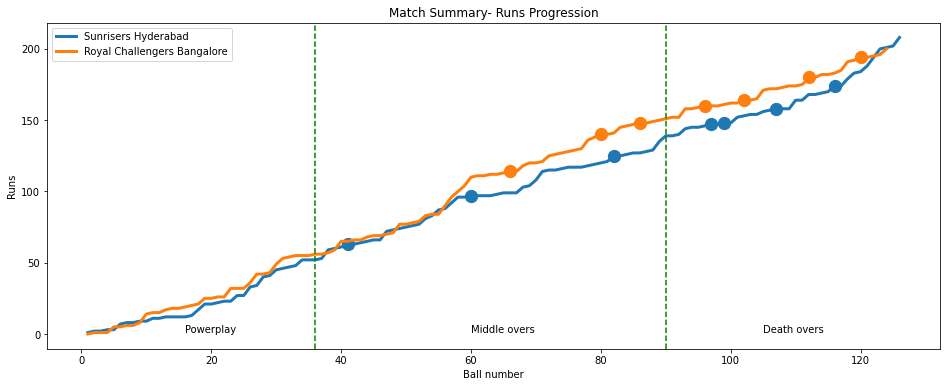

In [13]:
show_summary(df,981019)